# **Tutorial Overview**

This tutorial is divided into six parts; they are:

Using Callbacks in Keras

Evaluating a Validation Dataset

Monitoring Model Performance

Early Stopping in Keras

Checkpointing in Keras

Early Stopping Case Study

# **SCRIPT FOR EARLY STOPPING**

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)  # verbose=0 

# # fit model
# history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# # load the saved model
# saved_model = load_model('best_model.h5')

# **Using Callbacks in Keras**

Callbacks can be provided to the fit() function via the “callbacks” argument.

First, callbacks must be instantiated.

In [ ]:
# cb = Callback(...)
# Then, one or more callbacks that you intend to use must be added to a Python list.
# cb_list = [cb, ...]
# Finally, the list of callbacks is provided to the callback argument when fitting the model.
# model.fit(..., callbacks=cb_list)

# **Evaluating a Validation Dataset in Keras**

**Early stopping** requires that a validation dataset is evaluated during training.

model.fit(train_X, train_y, validation_data=(val_x, val_y))

model.fit(train_X, train_y, validation_split=0.3)

# **Monitoring Model Performance**

The loss function chosen to be optimized for your model is calculated at the end of each epoch.

To callbacks, this is made available via the name “loss.”

If a validation dataset is specified to the fit() function via the validation_data or validation_split arguments, then the loss on the validation dataset will be made available via the name “val_loss.”

If additional metrics are monitored during training, they are also available to the callbacks via the same name, such as ‘accuracy‘ for accuracy on the training dataset and ‘val_accuracy‘ for the accuracy on the validation dataset. Or, ‘mse‘ for mean squared error on the training dataset and ‘val_mse‘ on the validation dataset.

# **Early Stopping in Keras**

The “monitor” allows you to specify the performance measure to monitor in order to end training.
	
**es = EarlyStopping(monitor='val_loss')**

Based on the choice of performance measure, the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).

**es = EarlyStopping(monitor='val_loss', mode='min')**    #By default, mode is set to ‘auto‘ 

Training will stop when the chosen performance measure stops improving. To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.

**es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)**

We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument


**es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)**

By default, any change in the performance measure, no matter how fractional, will be considered an improvement. You may want to consider an improvement that is a specific increment, such as 1 unit for mean squared error or 1% for accuracy. This can be specified via the “min_delta” argument.

**es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)**

Finally, it may be desirable to only stop training if performance stays above or below a given threshold or baseline. For example, if you have familiarity with the training of the model (e.g. learning curves) and know that once a validation loss of a given value is achieved that there is no point in continuing training. This can be specified by setting the “baseline” argument.

This might be more useful when fine tuning a model, after the initial wild fluctuations in the performance measure seen in the early stages of training a new model are past.


**es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)**





# **Checkpointing in Keras**

The EarlyStopping callback will stop training once triggered, but the model at the end of training may not be the model with best performance on the validation dataset.

The ModelCheckpoint callback is flexible in the way it can be used, but in this case we will use it only to save the best model observed during training as defined by a chosen performance measure on the validation dataset.

The callback will save the model to file, which requires that a path and filename be specified via the first argument.

 **mc = ModelCheckpoint('best_model.h5')**

 The preferred loss function to be monitored can be specified via the monitor argument, in the same way as the EarlyStopping callback. For example, loss on the validation dataset (the default).

 **mc = ModelCheckpoint('best_model.h5', monitor='val_loss')**

 Also, as with the EarlyStopping callback, we must specify the “mode” as either minimizing or maximizing the performance measure. Again, the default is ‘auto,’ which is aware of the standard performance measures.

 **mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min')**

 Finally, we are interested in only the very best model observed during training, rather than the best compared to the previous epoch, which might not be the best overall if training is noisy. This can be achieved by setting the “save_best_only” argument to True.

 **mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)**

It may be interesting to know the value of the performance measure and at what epoch the model was saved. This can be printed by the callback by setting the “verbose” argument to “1“.


**mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)**






# **Early Stopping Case Study**

# **Binary Classification Problem**

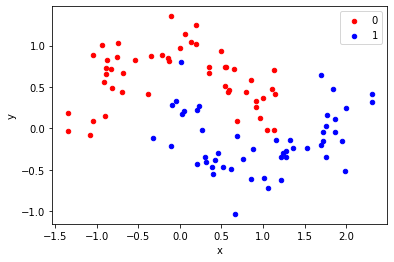

In [ ]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have higher error on the test dataset: a good case for using regularization. Further, the samples have noise, giving the model an opportunity to learn aspects of the samples that don’t generalize.

In [ ]:
X.shape,y.shape

((100, 2), (100,))

Train: 1.000, Test: 0.914


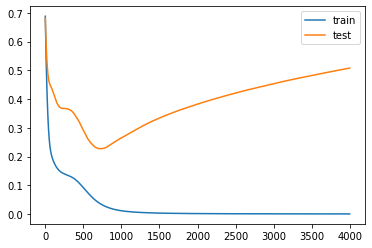

In [ ]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

A figure is created showing line plots of the model loss on the train and test sets.

We can see that expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

Reviewing the figure, we can also see flat spots in the ups and downs in the validation loss. Any early stopping will have to account for these behaviors. We would also expect that a good time to stop training might be around epoch 800.



# **Overfit MLP With Early Stopping**

**As soon as the loss of the model begins to increase on the test dataset, we will stop training**

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# fit model

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])


Epoch 00216: early stopping
Train: 0.967, Test: 0.814


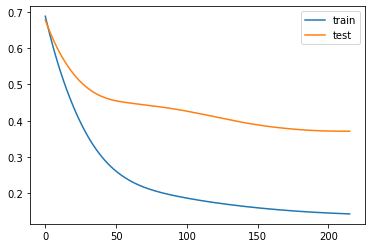

In [ ]:
# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Reviewing the line plot of train and test loss, we can indeed see that training was stopped at the point when validation loss began to plateau for the first time.**



We can also see that the callback stopped training at epoch 216. This is too early as we would expect an early stop to be around epoch 800. This is also highlighted by the classification accuracy on both the train and test sets, which is worse than no early stopping.

## **patient early stopping**

In this case, we will wait 200 epochs before training is stopped. Specifically, this means that we will allow training to continue for up to an additional 200 epochs after the point that validation loss started to degrade, giving the training process an opportunity to get across flat spots or find some additional improvement.

**patient early stopping**

**es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)**

Epoch 01095: early stopping
Train: 1.000, Test: 0.943


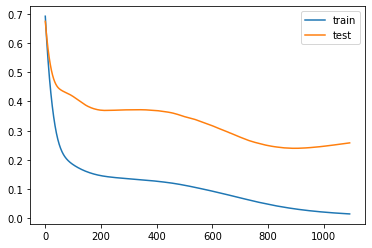

In [ ]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Reviewing the line plot of loss during training, we can see that the patience allowed the training to progress past some small flat and bad spots.**

**We can also see that test loss started to increase again in the last approximately 100 epochs.**

This means that although the performance of the model has improved, we may not have the best performing or most stable model at the end of training. We can address this by using a **ModelChecckpoint callback.**

In this case, we are interested in saving the model with the best accuracy on the test dataset. We could also seek the model with the best loss on the test dataset, but this may or may not correspond to the model with the best accuracy.

This highlights an important concept in model selection. The notion of the “best” model during training may conflict when evaluated using different performance measures. Try to choose models based on the metric by which they will be evaluated and presented in the domain. In a balanced binary classification problem, this will most likely be classification accuracy. Therefore, we will use accuracy on the validation in the ModelCheckpoint callback to save the best model observed during training.

**mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)**

During training, the entire model will be saved to the file “best_model.h5” only when accuracy on the validation dataset improves overall across the entire training process. A verbose output will also inform us as to the epoch and accuracy value each time the model is saved to the same file (e.g. overwritten)

**history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])**

In [ ]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.80000, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.80000

Epoch 00003: val_accuracy did not improve from 0.80000

Epoch 00004: val_accuracy did not improve from 0.80000

Epoch 00005: val_accuracy did not improve from 0.80000

Epoch 00006: val_accuracy did not improve from 0.80000

Epoch 00007: val_accuracy did not improve from 0.80000

Epoch 00008: val_accuracy did not improve from 0.80000

Epoch 00009: val_accuracy did not improve from 0.80000

Epoch 00010: val_accuracy did not improve from 0.80000

Epoch 00011: val_accuracy did not improve from 0.80000

Epoch 00012: val_accuracy did not improve from 0.80000

Epoch 00013: val_accuracy did not improve from 0.80000

Epoch 00014: val_accuracy did not improve from 0.80000

Epoch 00015: val_accuracy did not improve from 0.80000

Epoch 00016: val_accuracy did not improve from 0.80000

Epoch 00017: val_accuracy did not improve from 0.80000

Epoch 00018: va

Running the example, we can see the verbose output from the ModelCheckpoint callback for both when a new best model is saved and from when no improvement was observed.

We can see that the best model was observed at epoch 911 during this run.

**early stopping started at 878.**

**early stopping ended at 1054**

**Epoch 00911**: val_accuracy improved from 0.92857 to 0.94286, saving model to best_model.h5

**Model saved at 911 epoch.** 

**Again, we can see that early stopping continued patiently until after epoch 1,000. Note that epoch 912 + a patience of 200 is not epoch 1054 . Recall that early stopping is monitoring loss on the validation dataset and that the model checkpoint is saving models based on accuracy. As such, the patience of early stopping started at an epoch other than 912. ie started at 878**

In this case, we don’t see any further improvement in **model accuracy** on the test dataset. Nevertheless, we have followed a good practice.

**Why not monitor validation accuracy for early stopping?**

This is a good question. The main reason is that accuracy is a coarse measure of model performance during training and that loss provides more nuance when using early stopping with classification problems. The same measure may be used for early stopping and model checkpointing in the case of regression, such as mean squared error.

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)  # verbose=0 

# # fit model
# history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# # load the saved model
# saved_model = load_model('best_model.h5')

https://machinelearningmastery.com/check-point-deep-learning-models-keras/

# **How to Check-Point Deep Learning Models in Keras**

It is an approach where a snapshot of the state of the system is taken in case of system failure. If there is a problem, not all is lost. The checkpoint may be used directly, or used as the starting point for a new run, picking up where it left off.

When training deep learning models, the checkpoint is the weights of the model. These weights can be used to make predictions as is, or used as the basis for ongoing training.

# **Checkpoint Neural Network Model Improvements**

A good use of checkpointing is to output the model weights each time an improvement is observed during training.

Checkpointing is setup to save the network weights only when there is an improvement in classification accuracy on the validation dataset (monitor=’val_accuracy’ and mode=’max’). The weights are stored in a file that includes the score in the filename (weights-improvement-{val_accuracy=.2f}.hdf5).

In [3]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
numpy.random.seed(0)
# load pima indians dataset
dataset = numpy.loadtxt("data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.32677, saving model to weights-improvement-01-0.33.hdf5

Epoch 00002: val_accuracy did not improve from 0.32677

Epoch 00003: val_accuracy improved from 0.32677 to 0.56299, saving model to weights-improvement-03-0.56.hdf5

Epoch 00004: val_accuracy improved from 0.56299 to 0.65354, saving model to weights-improvement-04-0.65.hdf5

Epoch 00005: val_accuracy improved from 0.65354 to 0.66535, saving model to weights-improvement-05-0.67.hdf5

Epoch 00006: val_accuracy improved from 0.66535 to 0.68110, saving model to weights-improvement-06-0.68.hdf5

Epoch 00007: val_accuracy did not improve from 0.68110

Epoch 00008: val_accuracy improved from 0.68110 to 0.68504, saving model to weights-improvement-08-0.69.hdf5

Epoch 00009: val_accuracy improved from 0.68504 to 0.68898, saving model to weights-improvement-09-0.69.hdf5

Epoch 00010: val_accuracy did not improve from 0.68898

Epoch 00011: val_accuracy did not improve from 0.68898

Epoch 00

You will see a number of files in your working directory containing the network weights in HDF5 format. For example:

...
weights-improvement-53-0.76.hdf5

weights-improvement-71-0.76.hdf5

weights-improvement-77-0.78.hdf5

weights-improvement-99-0.78.hdf5

It may create a lot of unnecessary check-point files if the validation accuracy moves up and down over training epochs. Nevertheless, it will ensure that you have a snapshot of the best model discovered during your run.

# **Checkpoint Best Neural Network Model Only**

A simpler check-point strategy is to save the model weights to the same file, if and only if the validation accuracy improves.

This can be done easily using the same code from above and changing the output filename to be fixed (not include score or epoch information).

In this case, model weights are written to the file “weights.best.hdf5” only if the classification accuracy of the model on the validation dataset improves over the best seen so far.

In [4]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# load pima indians dataset
dataset = numpy.loadtxt("data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.63386, saving model to weights.best.hdf5

Epoch 00002: val_accuracy improved from 0.63386 to 0.64961, saving model to weights.best.hdf5

Epoch 00003: val_accuracy did not improve from 0.64961

Epoch 00004: val_accuracy did not improve from 0.64961

Epoch 00005: val_accuracy did not improve from 0.64961

Epoch 00006: val_accuracy did not improve from 0.64961

Epoch 00007: val_accuracy improved from 0.64961 to 0.68110, saving model to weights.best.hdf5

Epoch 00008: val_accuracy did not improve from 0.68110

Epoch 00009: val_accuracy did not improve from 0.68110

Epoch 00010: val_accuracy did not improve from 0.68110

Epoch 00011: val_accuracy did not improve from 0.68110

Epoch 00012: val_accuracy did not improve from 0.68110

Epoch 00013: val_accuracy did not improve from 0.68110

Epoch 00014: val_accuracy did not improve from 0.68110

Epoch 00015: val_accuracy did not improve from 0.68110

Epoch 00016: val_accuracy did not improve fro

In this case there will be only one file will be there every time it is only overwritten with better weights each time.

**You should see the weight file in your local directory**

**weights.best.hdf5**


This is a handy checkpoint strategy to always use during your experiments.

It will ensure that your best model is saved for the run for you to use later if you wish. It avoids you needing to include code to manually keep track and serialize the best model when training.

# **save_weights_only=True**
**In this case only weights will be saved .**

**When False (default) the full model is saved.**

In [27]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# load pima indians dataset
dataset = numpy.loadtxt("data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="WEIGHTS.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.48819, saving model to WEIGHTS.hdf5

Epoch 00002: val_accuracy improved from 0.48819 to 0.64961, saving model to WEIGHTS.hdf5

Epoch 00003: val_accuracy improved from 0.64961 to 0.67323, saving model to WEIGHTS.hdf5

Epoch 00004: val_accuracy did not improve from 0.67323

Epoch 00005: val_accuracy did not improve from 0.67323

Epoch 00006: val_accuracy did not improve from 0.67323

Epoch 00007: val_accuracy did not improve from 0.67323

Epoch 00008: val_accuracy did not improve from 0.67323

Epoch 00009: val_accuracy did not improve from 0.67323

Epoch 00010: val_accuracy did not improve from 0.67323

Epoch 00011: val_accuracy did not improve from 0.67323

Epoch 00012: val_accuracy did not improve from 0.67323

Epoch 00013: val_accuracy improved from 0.67323 to 0.67717, saving model to WEIGHTS.hdf5

Epoch 00014: val_accuracy did not improve from 0.67717

Epoch 00015: val_accuracy did not improve from 0.67717

Epoch 00016: val_accuracy 

In [31]:
reconstructed_model = tf.keras.models.load_model("WEIGHTS.hdf5")   # Will show error becuase it cannot load weights

ValueError: ignored

# **Loading a Check-Pointed Neural Network Model**

Now that you have seen how to checkpoint your deep learning models during training, you need to review how to load and use a checkpointed model.

The checkpoint only includes the model weights. It assumes you know the network structure. This too can be serialize to file in JSON or YAML format.

In the example below, the model structure is known and the best weights are loaded from the previous experiment, stored in the working directory in the weights.best.hdf5 file.

The model is then used to make predictions on the entire dataset.

In [8]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")
# load pima indians dataset
dataset = numpy.loadtxt("data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 74.74%


In [11]:
import tensorflow as tf


In [32]:
#reconstructed_model = tf.keras.models.load_model("weights.best.hdf5")   # Will not show error becuase weights.best.hdf5 is a full model which is saved not the weights .

In [33]:
#reconstructed_model.layers

In [26]:
#reconstructed_model.get_weights()[0]

array([[ 0.2012105 ,  0.21958354, -0.04222003, -0.4247565 , -0.55825996,
        -0.02467169, -0.12276898, -0.2565144 , -0.42814165,  0.23259005,
        -0.13249376, -1.3165555 ],
       [-0.17248133,  0.50015473,  0.45032033,  0.01090059,  0.33372825,
         0.44702044, -0.03893916,  0.19544621,  0.43147588,  0.28966913,
         0.39321014,  0.02894524],
       [-0.219439  , -0.43216082, -0.04196663,  0.21077098,  0.4370833 ,
        -0.08448264, -0.35249764,  0.1950524 , -0.5798177 , -0.21817675,
        -0.08578539, -0.06434765],
       [ 0.34673187,  0.57993466, -0.27455908,  0.3344293 , -0.1390661 ,
        -0.269308  ,  0.5312318 , -0.3184016 , -0.33035874, -0.4731343 ,
         0.41783917,  0.44869977],
       [-0.37074476, -0.2446936 , -0.14640617,  0.32015178,  0.44154742,
         0.36842284, -0.07209061,  0.26399997,  0.11652065,  0.35230082,
        -0.12014816,  0.06043706],
       [ 0.29337308,  0.22140034, -0.08937096, -0.07717159, -0.33310685,
         0.3618571 ,  